<a href="https://colab.research.google.com/github/Mart1n2015/MartinCerioli/blob/main/TRABAJODECASAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#En caso de necesitar subir los archivos de forma manual dejare los archivos correspondientes
from google.colab import files
import io
import pandas as pd

# Subir archivo(s)
uploaded = files.upload()  # esto abre el diálogo de subida

# Tomar el primer archivo subido (funciona aunque el nombre cambie)
filename = next(iter(uploaded))
print("Archivo subido (key):", filename)

# Cargar en DataFrame desde la bytes-representación
try:
    df = pd.read_csv(io.BytesIO(uploaded[filename]), low_memory=False)
except UnicodeDecodeError:
    # si hay problemas de encoding intentamos latin1
    df = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1', low_memory=False)

print("Shape:", df.shape)
df.head()

In [ ]:
#Asociar la ruta a una variable
df= pd.read_csv('/content/ejemplo_output.csv.csv')

In [ ]:
#Asociar la ruta a una variable
df_test= pd.read_csv('/content/test.csv')

In [ ]:
#Asociar la ruta a una variable
df_train= pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [ ]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_test["SaleCondition"].value_counts()

,count
SaleCondition,
Normal,1204
Partial,120
Abnorml,89
Family,26
Alloca,12
AdjLand,8


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
##comensamos con el modelo de regresion
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# === 2. Selección de variables ===
X = df_train[["LotArea", "YrSold" , "LotFrontage"]]
y = df_train["SalePrice"]

In [33]:
# === 2. División de datos ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# === 3. Modelo 1: Regresión Lineal ===
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)
y_pred_lineal = modelo_lineal.predict(X_test)

# Métricas del modelo lineal
mae_lineal = mean_absolute_error(y_test, y_pred_lineal)
mse_lineal = mean_squared_error(y_test, y_pred_lineal)
r2_lineal = r2_score(y_test, y_pred_lineal)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
#Realizando las predicciones
y_pred = modelo_lineal.predict(X_test)

In [ ]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
pred

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred['Actual'], pred['Actual'], color='blue', label='Actual', s=32, alpha=0.8)
plt.scatter(pred['Actual'], pred['Predicted'], color='red', label='Predicted', s=32, alpha=0.8)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
#Conteo de datos
print('📈 Datos a tener en cuenta para Modelo: REGRESIÓN LINEAL')
print(f"MAE: {mae_lineal:.3f}")
print(f"El MSE es: {mse_lineal:.3f}")
print(f"R²:  {r2_lineal:.3f}")
print("-"*50)

In [ ]:
# === 4. Modelo 2: Random Forest Regressor ===
modelo_rf = RandomForestRegressor(n_estimators=200, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

In [ ]:
# Métricas del modelo RF
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("📈 Datos a tener en cuenta para Modelo: RANDOM FOREST REGRESSOR")
print(f"MAE: {mae_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")
print(f"R²:  {r2_rf:.3f}")

📈 Datos a tener en cuenta para Modelo: RANDOM FOREST REGRESSOR
MAE: 55472.511
MSE: 6815406607.081
R²:  0.111


NameError: name 'y_pred_rf' is not defined

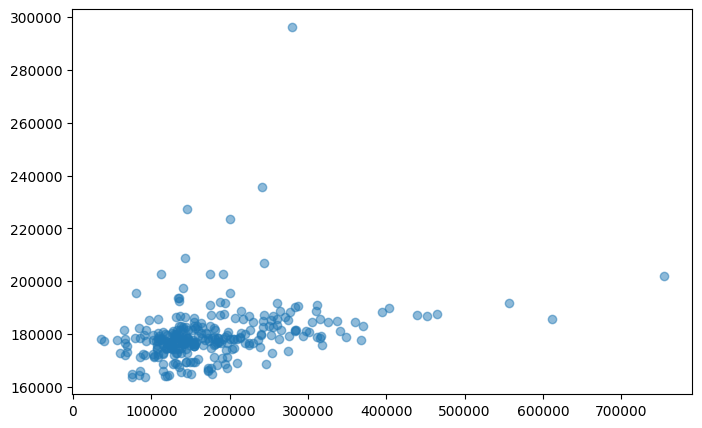

In [35]:
# === 5. Comparación visual ===
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lineal, alpha=0.5, label="Regresión Lineal")
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Random Forest", color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Comparación: Reales vs Predichos")
plt.legend()
plt.show()

# === 6. Importancia de variables (solo para Random Forest) ===
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n🔍 Importancia de variables (Random Forest):")
print(importancias)